In [ ]:
## Course: INF2178
## Student name: Jingwen Ji
## Student no: 1006128101

In [68]:
%pip install pingouin
import pandas as pd
import seaborn as sns
import pingouin as pg
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp
import statsmodels.stats.anova as sa
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.anova import AnovaRM
import scipy.stats as stats
from scipy.stats import shapiro, levene, bartlett

In [51]:
df = pd.read_csv("INF2178_A4_data.csv")
df.head()

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444


In [52]:
# Dropping the first unnamed column
df_cleaned = df.drop(columns=["Unnamed: 0"])


In [53]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  294 non-null    object 
 1   MRI ID      294 non-null    object 
 2   Group       294 non-null    object 
 3   Visit       294 non-null    int64  
 4   MR Delay    294 non-null    int64  
 5   M/F         294 non-null    object 
 6   Hand        294 non-null    object 
 7   Age         294 non-null    int64  
 8   EDUC        294 non-null    int64  
 9   SES         279 non-null    float64
 10  MMSE        293 non-null    float64
 11  CDR         294 non-null    float64
 12  eTIV        294 non-null    int64  
 13  nWBV        294 non-null    float64
 14  ASF         294 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 34.6+ KB


**EDA**

In [54]:
df_cleaned.shape

(294, 15)

In [55]:
# Check for missing values in each column
df_cleaned.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [56]:
# Calculate descriptive statistics
df_cleaned.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,294.000000,294.000000,294.000000,294.000000,279.000000,293.000000,294.000000,294.000000,294.000000,294.000000
mean,1.489796,349.785714,76.411565,14.561224,2.491039,27.259386,0.301020,1478.853741,0.731381,1.203109
std,0.500748,400.741520,7.607074,2.884818,1.128008,3.413454,0.381347,176.559755,0.037373,0.139365
min,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.703000,1.118250
50%,1.000000,0.000000,76.000000,14.500000,2.000000,29.000000,0.000000,1461.500000,0.732000,1.201000
75%,2.000000,671.500000,81.000000,16.000000,3.000000,30.000000,0.500000,1569.000000,0.756000,1.302750
max,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [57]:
# Impute missing MMSE and SES values with the median
df_cleaned['MMSE'].fillna(df_cleaned['MMSE'].median(), inplace=True)
df_cleaned['SES'].fillna(df_cleaned['SES'].median(), inplace=True)

missing_values_cleaned = df_cleaned.isnull().sum()
missing_values_cleaned


Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

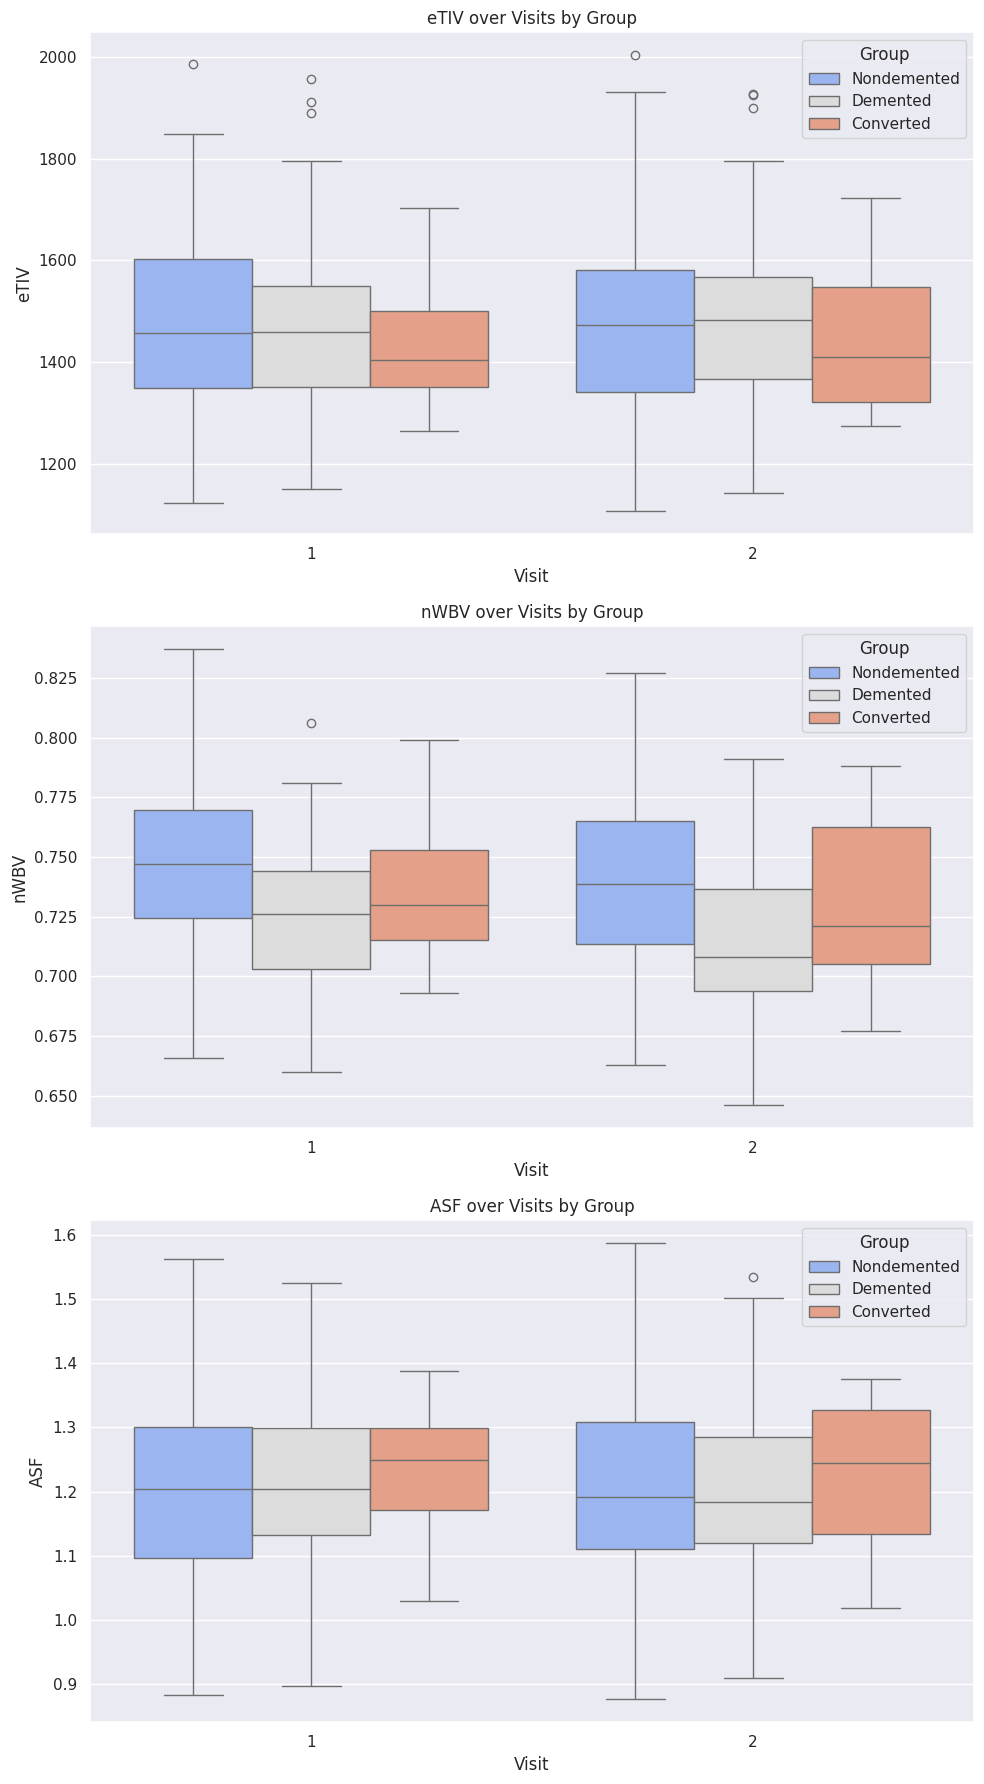

In [58]:
# Drawing boxplots of eTIV, nWBV, and ASF over visits, separated by group

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# eTIV over Visits by Group
sns.boxplot(ax=axes[0], x='Visit', y='eTIV', hue='Group', data=df_cleaned, palette="coolwarm")
axes[0].set_title('eTIV over Visits by Group')

# nWBV over Visits by Group
sns.boxplot(ax=axes[1], x='Visit', y='nWBV', hue='Group', data=df_cleaned, palette="coolwarm")
axes[1].set_title('nWBV over Visits by Group')

# ASF over Visits by Group
sns.boxplot(ax=axes[2], x='Visit', y='ASF', hue='Group', data=df_cleaned, palette="coolwarm")
axes[2].set_title('ASF over Visits by Group')

plt.tight_layout()
plt.show()


**Mixed-Effect Anova**

In [59]:
# Perform mixed-effect ANOVA for nWBV based on Group and Visit
anova_results_nWBV = pg.mixed_anova(dv='nWBV', between='Group', within='Visit', subject='Subject ID', data=df_cleaned)
anova_results_nWBV

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,0.033640,2,141,0.016820,6.712381,1.642113e-03,0.086934,NaN
1,Visit,0.006508,1,141,0.006508,94.251225,2.226896e-17,0.400641,1.0
2,Interaction,0.000212,2,141,0.000106,1.533508,2.193542e-01,0.021289,NaN


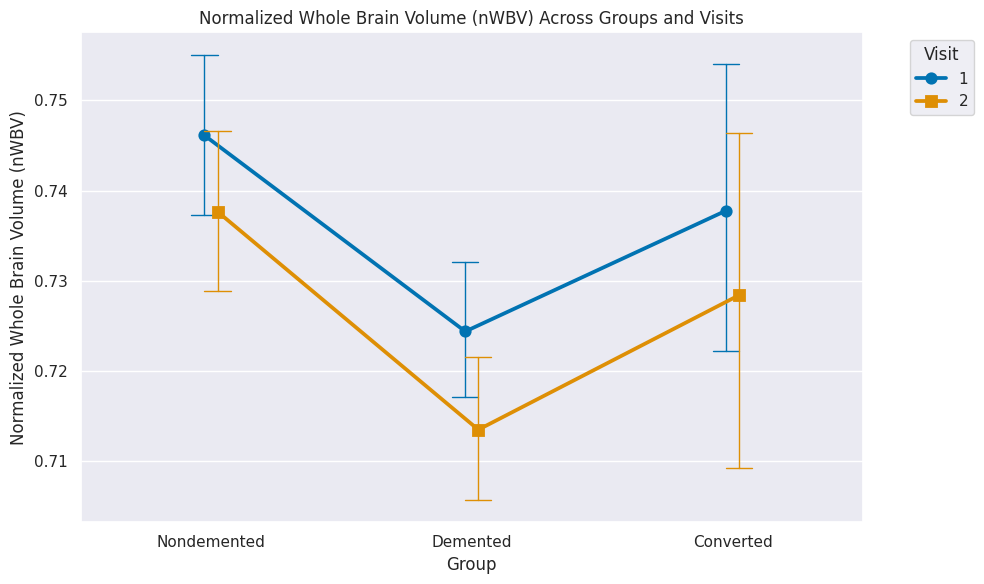

In [60]:
# Visualize the interaction effects

sns.set()
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_cleaned, x='Group', y='nWBV', hue='Visit', dodge=True, markers=['o', 's'],
              capsize=.1, err_kws={'linewidth': 1}, palette='colorblind')

plt.title('Normalized Whole Brain Volume (nWBV) Across Groups and Visits')
plt.xlabel('Group')
plt.ylabel('Normalized Whole Brain Volume (nWBV)')
plt.legend(title='Visit', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [61]:
# Test for normality
normality_tests = {}
for group in df_cleaned['Group'].unique():
    for visit in df_cleaned['Visit'].unique():
        sample = df_cleaned[(df_cleaned['Group'] == group) & (df_cleaned['Visit'] == visit)]['nWBV']
        stat, p = shapiro(sample.dropna())
        normality_tests[f'Group: {group}, Visit: {visit}'] = p

normality_tests

{'Group: Nondemented, Visit: 1': 0.7719990015029907,
 'Group: Nondemented, Visit: 2': 0.5108829736709595,
 'Group: Demented, Visit: 1': 0.9546263217926025,
 'Group: Demented, Visit: 2': 0.38469114899635315,
 'Group: Converted, Visit: 1': 0.341467946767807,
 'Group: Converted, Visit: 2': 0.5023510456085205}

In [62]:
# Test for normality
# Combine 'Group' and 'Visit' into a single 'group-visit' column
df_cleaned['group-visit'] = df_cleaned['Group'] + ', Visit: ' + df_cleaned['Visit'].astype(str)

normality_results = pg.normality(data=df_cleaned, dv='nWBV', group='group-visit')
print(normality_results)


                              W      pval  normal
group-visit                                      
Nondemented, Visit: 1  0.988723  0.771999    True
Nondemented, Visit: 2  0.983956  0.510883    True
Demented, Visit: 1     0.992007  0.954626    True
Demented, Visit: 2     0.979475  0.384691    True
Converted, Visit: 1    0.933507  0.341468    True
Converted, Visit: 2    0.940329  0.502351    True


In [63]:
# Test for homogenity
print(pg.homoscedasticity(df_cleaned[df_cleaned['Visit'] == 1], dv='nWBV', group='Group'))
print(pg.homoscedasticity(df_cleaned[df_cleaned['Visit'] == 2], dv='nWBV', group='Group'))

               W     pval  equal_var
levene  1.045199  0.35422       True
               W      pval  equal_var
levene  0.298582  0.742338       True


In [66]:
# Test for sphericity
pg.sphericity(data=df_cleaned, dv='nWBV', within='Visit', subject='Subject ID')[-1]

1.0

In [70]:
# Perform post-hoc pairwise t test
post_hoc_results = pg.pairwise_tests(dv='nWBV', between='Group', within='Visit', subject='Subject ID', data=df_cleaned)
print(post_hoc_results)

        Contrast Visit          A            B Paired Parametric         T  \
0          Visit     -          1            2   True       True  9.672288   
1          Group     -  Converted     Demented  False       True  1.401412   
2          Group     -  Converted  Nondemented  False       True -0.647523   
3          Group     -   Demented  Nondemented  False       True -3.690388   
4  Visit * Group     1  Converted     Demented  False       True  1.444264   
5  Visit * Group     1  Converted  Nondemented  False       True -0.465015   
6  Visit * Group     1   Demented  Nondemented  False       True -3.413189   
7  Visit * Group     2  Converted     Demented  False       True  1.324162   
8  Visit * Group     2  Converted  Nondemented  False       True -0.811482   
9  Visit * Group     2   Demented  Nondemented  False       True -3.856310   

          dof alternative         p-unc       BF10    hedges  
0  143.000000   two-sided  2.460952e-17  2.258e+14  0.254531  
1   14.675514  

In [71]:
anova_results_mmse = pg.mixed_anova(dv='MMSE', between='Group', within='Visit', subject='Subject ID', data=df_cleaned)
anova_results_mmse

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,1313.469108,2,141,656.734554,55.470079,1.692314e-18,0.440343,NaN
1,Visit,20.586806,1,141,20.586806,8.032721,5.268998e-03,0.053899,1.0
2,Interaction,15.548755,2,141,7.774378,3.033467,5.130233e-02,0.041253,NaN


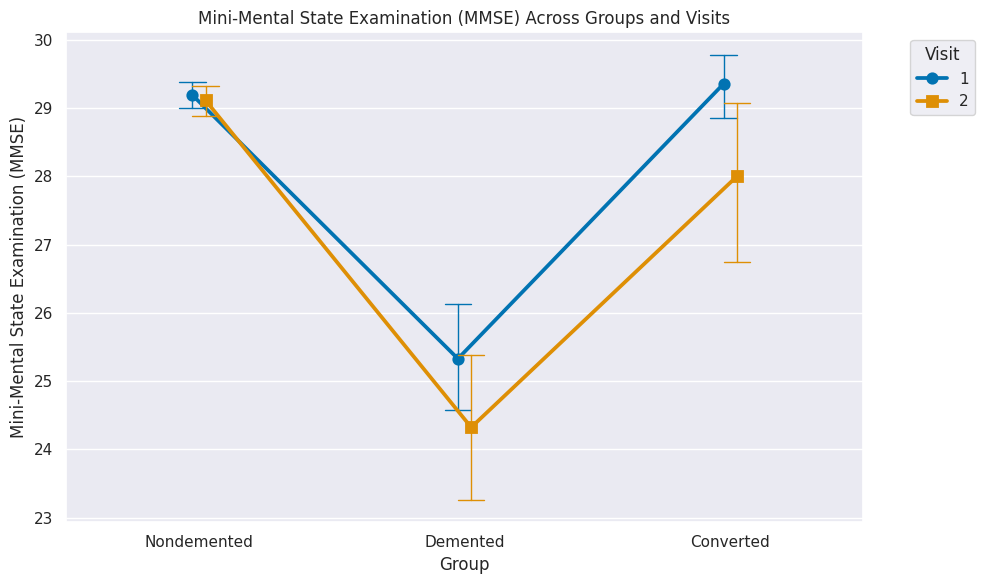

In [77]:
# Visualize the interaction effects

sns.set()
plt.figure(figsize=(10, 6))
sns.pointplot(data=df_cleaned, x='Group', y='MMSE', hue='Visit', dodge=True, markers=['o', 's'],
              capsize=.1, err_kws={'linewidth': 1}, palette='colorblind')

plt.title('Mini-Mental State Examination (MMSE) Across Groups and Visits')
plt.xlabel('Group')
plt.ylabel('Mini-Mental State Examination (MMSE)')
plt.legend(title='Visit', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [72]:
# Test for normality
normality_tests = {}
for group in df_cleaned['Group'].unique():
    for visit in df_cleaned['Visit'].unique():
        sample = df_cleaned[(df_cleaned['Group'] == group) & (df_cleaned['Visit'] == visit)]['MMSE']
        stat, p = shapiro(sample.dropna())
        normality_tests[f'Group: {group}, Visit: {visit}'] = p

normality_tests

{'Group: Nondemented, Visit: 1': 1.5398718744563666e-08,
 'Group: Nondemented, Visit: 2': 3.312041130243415e-08,
 'Group: Demented, Visit: 1': 0.009978835470974445,
 'Group: Demented, Visit: 2': 0.00010744226165115833,
 'Group: Converted, Visit: 1': 0.000777733395807445,
 'Group: Converted, Visit: 2': 0.07826245576143265}

In [74]:
# Test for homogenity
print(pg.homoscedasticity(df_cleaned[df_cleaned['Visit'] == 1], dv='MMSE', group='Group'))
print(pg.homoscedasticity(df_cleaned[df_cleaned['Visit'] == 2], dv='MMSE', group='Group'))

               W          pval  equal_var
levene  36.89391  1.036701e-13      False
                W          pval  equal_var
levene  33.966913  9.106051e-13      False


In [75]:
# Test for sphericity
pg.sphericity(data=df_cleaned, dv='MMSE', within='Visit', subject='Subject ID')[-1]

1.0

In [76]:
# Perform post-hoc pairwise t test
post_hoc_results = pg.pairwise_tests(dv='MMSE', between='Group', within='Visit', subject='Subject ID', data=df_cleaned)
print(post_hoc_results)

        Contrast Visit          A            B Paired Parametric         T  \
0          Visit     -          1            2   True       True  2.794743   
1          Group     -  Converted     Demented  False       True  6.710040   
2          Group     -  Converted  Nondemented  False       True -1.302773   
3          Group     -   Demented  Nondemented  False       True -9.457915   
4  Visit * Group     1  Converted     Demented  False       True  8.075525   
5  Visit * Group     1  Converted  Nondemented  False       True  0.488598   
6  Visit * Group     1   Demented  Nondemented  False       True -9.123660   
7  Visit * Group     2  Converted     Demented  False       True  4.469041   
8  Visit * Group     2  Converted  Nondemented  False       True -1.815516   
9  Visit * Group     2   Demented  Nondemented  False       True -8.385460   

          dof alternative         p-unc       BF10    hedges  
0  143.000000   two-sided  5.907453e-03      3.872  0.155603  
1   50.636274  

**Power Analysis**

In [78]:
effect_size = 0.7
alpha = 0.05
power = 0.91

analysis = TTestIndPower()

sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')
print(f"Required sample size: {sample_size:.2f}")

Required sample size: 45.45


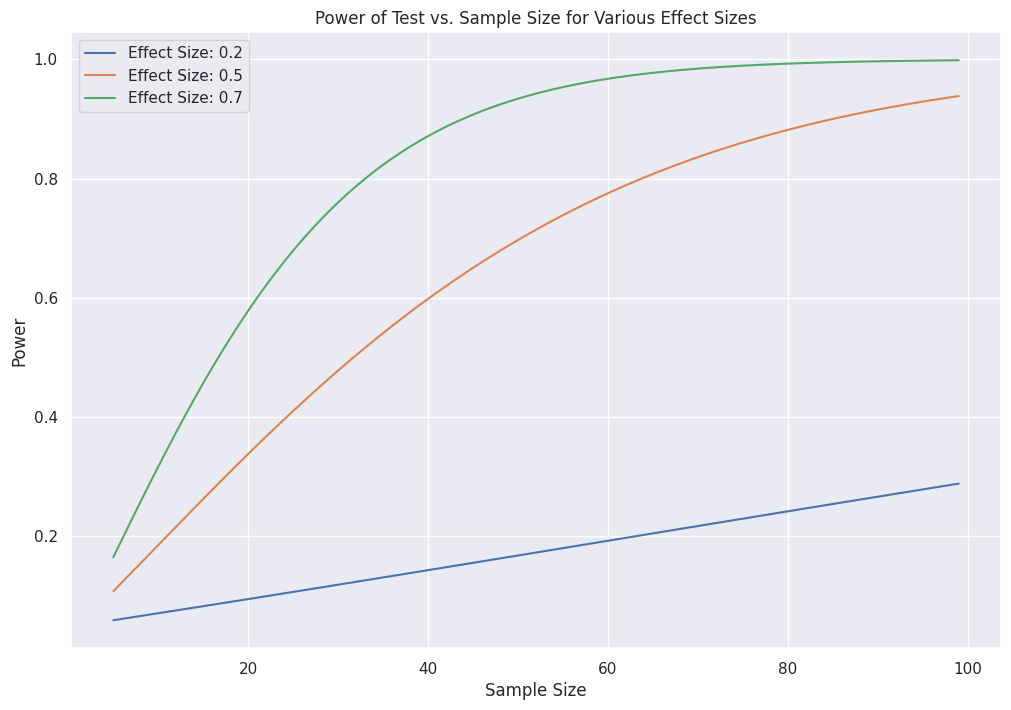

In [82]:
# Define sample sizes as a numpy array for more flexible operations
sample_sizes = np.arange(5, 100)
effect_sizes_dict = {'Small': 0.2, 'Medium': 0.5, 'Large': 0.7}

# Initialize a figure
plt.figure(figsize=(12, 8))

for label, effect_size in effect_sizes_dict.items():
    # Calculate power for each combination of effect size and sample size
    power = analysis.solve_power(effect_size=effect_size, nobs1=sample_sizes, alpha=0.05, power=None, ratio=1.0)
    # Plot
    plt.plot(sample_sizes, power, label=f'Effect Size: {effect_size}')

plt.title('Power of Test vs. Sample Size for Various Effect Sizes')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.legend()
plt.show()
